If we talk about classification problems, the most common metrics used are: - - - - - - - - -
<br>

* Precision (P)
* Recall (R)
* F1 score (F1)
* Area under the ROC (Receiver Operating Characteristic) curve or simply
* AUC (AUC)
* Log loss
* Precision at k (P@k)
* Average precision at k (AP@k)
* Mean average precision at k (MAP@k)<br>


When it comes to regression, the most commonly used evaluation metrics are: - <br>
* Mean absolute error (MAE) - - - - - -
* Mean squared error (MSE)
* Root mean squared error (RMSE)
* Root mean squared logarithmic error (RMSLE)
* Mean percentage error (MPE)
* Mean absolute percentage error (MAPE)
* R2

In [ ]:
from sklearn.datasets import make_classification, make_regression, make_blobs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
X_class, y_class = make_classification(
    n_samples= 1000,
    n_features=5,
    n_informative=4,
    n_redundant=1,
    n_classes= 2,
    random_state = 42
)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
def accuracy(y_true, y_pred):
  """
  Function to calculate accuracy
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: accuracy score
  """

  correct_counter = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == yp:
      correct_counter += 1

  return correct_counter/len(y_true)

In [ ]:
accuracy_manual = accuracy(y_test, y_pred)
print("manual accuracy score", accuracy_manual)

manual accuracy score 0.84


In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.84

In [ ]:
def true_positive(y_true, y_pred):
  """
  Function to calculate True positives
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: number of true positives
  """
  tp = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 1 and yp== 1:
      tp+=1
  return tp

def true_negative(y_true, y_pred):
  """
  Function to calculate True negatives
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: number of true negatives
  """
  tp = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 0 and yp== 0:
      tp+=1
  return tp

def false_positive(y_true, y_pred):
  """
  Function to calculate false positives
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: number of false positives
  """
  tp = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 0 and yp== 1:
      tp+=1
  return tp

def false_negative(y_true, y_pred):
  """
  Function to calculate false negatives
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: number of false negatives
  """
  tp = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 1 and yp== 0:
      tp+=1
  return tp


Accuracy Score = (Tp + Tn) / (Tp + Tn + Fp + Fn)

In [ ]:
def accuracy_v2(y_true, y_pred):
  """
  Function to calculate accuracy using tp/tn/fp/fn
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: accuracy score
  """
  tp = true_positive(y_true, y_pred)
  fp = false_positive(y_true, y_pred)
  fn = false_negative(y_true, y_pred)
  tn = true_negative(y_true, y_pred)

  accuracy_score = (tp+ tn)/(tp+ tn+ fp+ fn)
  return accuracy_score

In [ ]:
accuracy(y_test, y_pred)

0.84

In [ ]:
accuracy_v2(y_test, y_pred)

0.84

## Precision

precision = TP/ (TP + FP) <br>


In [ ]:
def precision(y_true, y_pred):
  """
  Function to calculate precision
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: precision score
  """

  tp = true_positive(y_true, y_pred)
  fp = false_positive(y_true, y_pred)
  precision = tp/(tp + fp)
  return precision

In [ ]:
precision(y_test, y_pred)

0.8365384615384616

## Recall
recall = TP/ (TP + FN)

In [ ]:
def recall(y_true, y_pred):
  """
  Function to calculate recall
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: recall score
  """
  tp = true_positive(y_true, y_pred)
  fn = false_negative(y_true, y_pred)
  return (tp)/(tp+ fn)

In [ ]:
recall(y_test, y_pred)

0.8529411764705882

In [ ]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_pred =  [0.02638412, 0.11114267, 0.31620708,
0.0490937,  0.0191491,  0.17554844,
0.15952202, 0.03819563, 0.11639273,
0.079377,
0.08584789, 0.39095342,
0.27259048, 0.03447096, 0.04644807,
0.03543574, 0.18521942, 0.05934905,
0.61977213, 0.33056815]

In [ ]:
len(y_true)

20

In [ ]:
precisions = []
recalls = []
# how we assumed these thresholds is a long story
thresholds = [0.0490937 , 0.05934905, 0.079377,
0.08584789, 0.11114267, 0.11639273,
0.15952202, 0.17554844, 0.18521942,
0.27259048, 0.31620708, 0.33056815,
0.39095342, 0.61977213]

In [ ]:
for i in thresholds:
  temp_prediction = [1 if x >= i else 0 for x in y_pred]
  p = precision(y_true, temp_prediction)
  r = recall(y_true, temp_prediction)
  precisions.append(p)
  recalls.append(r)

In [ ]:
plt.figure(figsize = (7, 7))

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

In [ ]:
def log_loss(y_true, y_proba):
  """
  Function to calculate log loss
  :param y_true: list of true values
  :param y_proba: list of probabilities for 1
  :return: overall log loss
  """

  epsilon = 1e-15
  loss = []
  for yt, yp in zip(y_true, y_proba):
    yp = np.clip(yp, epsilon, 1 -epsilon)
    temp_loss = -1.0 * (
        yt * np.log(yp)
        + (1 - yt) * np.log(1-yp)
    )
    loss.append(temp_loss)

  return np.mean(loss)

In [ ]:
y_true = [0, 0, 0, 0, 1, 0, 1,
0, 0, 1, 0, 1, 0, 0, 1]
y_proba = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
0.85, 0.15, 0.99]

In [ ]:
log_loss(y_true, y_proba)

np.float64(0.49882711861432294)

In [ ]:
from sklearn import metrics

metrics.log_loss(y_true, y_proba)

0.49882711861432294

**Macro averaged precision**: calculate precision for all classes individually
and then average them. <br>
**Micro averaged precision**: calculate class wise true positive and false
positive and then use that to calculate overall precision <br>
**Weighted precision**: same as macro but in this case, it is weighted average
depending on the number of items in each class

In [ ]:
import numpy as np

def macro_precision(y_true, y_pred):
  """
  Function to calculate macro averaged precision
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: macro precision score
  """

  num_classes = len(np.unique(y_true))
  precision = 0
  for class_ in range(num_classes):
    temp_true = [1 if p == class_ else 0 for p in y_true]
    temp_pred = [1 if p==class_ else 0 for p in y_pred]

    tp = true_positive(temp_true, temp_pred)
    fp= false_positive(temp_true, temp_pred)

    temp_precision = tp/(tp + fp)
    precision += temp_precision

  precision /= num_classes
  return precision


In [ ]:
def micro_precision(y_true, y_pred):
  """
  Function to calculate micro averaged precision
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: micro precision score
  """
  num_classes = len(np.unique(y_true))
  tp = 0
  fp = 0

  for class_ in range(num_classes):
    temp_true = [1 if p == class_ else 0 for p in y_true]
    temp_pred = [1 if p == class_ else 0 for p in y_pred]

    tp += true_positive(temp_true, temp_pred)
    fp += false_positive(temp_true, temp_pred)

  precision = tp / (tp+ fp)
  return precision

In [ ]:
from collections import Counter
import numpy as np

def weighted_precision(y_true, y_pred):
  """
  Function to calculate weighted averaged precision
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: weighted precision score
  """
  num_classes = len(np.unique(y_true))
  class_counts = Counter(y_true)
  precision = 0

  for class_ in range(num_classes):
    temp_true = [1 if p == class_ else 0 for p in y_true]
    temp_pred = [1 if p == class_ else 0 for p in y_pred]

    tp = true_positive(temp_true, temp_pred)
    fp = false_positive(temp_true, temp_pred)

    temp_precision = tp / (tp + fp)

    weighted_precision = class_counts[class_] * temp_precision
    precision += weighted_precision

  overall_precision = precision / len(y_true)
  return overall_precision


One-line Decision Rule

Micro → overall performance, high imbalance, majority classes matter

Macro → fairness, equal importance of classes

Weighted → middle ground: respect imbalance but don’t ignore minority classes

## **Industry Example Summary**

| Domain                                 | Typical Metric | Reason                                           |
| -------------------------------------- | -------------- | ------------------------------------------------ |
| **Search, product tagging**            | Micro          | Heavy class imbalance + overall accuracy matters |
| **Medical ML**                         | Macro          | Minority classes critical                        |
| **Toxic content / safety models**      | Macro          | Equal treatment of all harmful categories        |
| **E-commerce classification**          | Weighted       | Business-focused, still handles imbalance        |
| **Ticket classification (IT/Support)** | Weighted       | Large uneven classes, but all must be respected  |
| **NER / token tagging**                | Micro          | Lots of tokens → overall precision matters       |

---



In [ ]:
from sklearn import metrics

y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]

print(macro_precision(y_true, y_pred))
print(metrics.precision_score(y_true, y_pred, average = "macro"))

0.3611111111111111
0.3611111111111111


In [ ]:
print(micro_precision(y_true, y_pred))
print(metrics.precision_score(y_true, y_pred, average = "micro"))

0.4444444444444444
0.4444444444444444


In [ ]:
print(weighted_precision(y_true, y_pred))
print(metrics.precision_score(y_true, y_pred, average = "weighted"))

0.39814814814814814
0.39814814814814814


In [ ]:
def macro_recall(y_true, y_pred):
  """
  Function to calculate macro recall
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: macro recall score  
  """
  num_classes = len(np.unique(y_true))
  recall = 0
  for class_ in range(num_classes):
    temp_true = [1 if p == class_ else 0 for p in y_true]
    temp_pred = [1 if p== class_ else 0 for p in y_pred]

    tp = true_positive(temp_true, temp_pred)
    fn = false_negative(temp_true, temp_pred)

    temp_recall = tp/ (tp + fn)
    recall += temp_recall

  recall /= num_classes
  return recall


In [ ]:
def micro_recall(y_true, y_pred):
  """
  Function to calculate micro recall
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: micro recall score
  """

  num_classes = len(np.unique(y_true))
  tp = 0
  fn = 0
  for class_ in range(num_classes):
    temp_true = [1 if p == class_ else 0 for p in y_true]
    temp_pred = [1 if p == class_ else 0 for p in y_pred]

    temp_tp = true_positive(temp_true, temp_pred)
    temp_fn = false_negative(temp_true, temp_pred)

    tp += temp_tp
    fn += temp_fn

  recall = tp / (tp + fn)
  return recall



In [ ]:
print(macro_recall(y_true, y_pred))
print(metrics.recall_score(y_true, y_pred, average="macro"))

0.4166666666666667
0.4166666666666667


In [ ]:
def weighted_f1(y_true, y_pred):
  """
  Function to calculate weighted f1 score
  :param y_ture: list of true values
  :param y_proba: list of predicted values
  :return: weighted f1 score
  """

  num_classes = len(np.unique(y_true))
  class_counts = Counter(y_true)

  f1 = 0
  for class_ in range(num_classes):
    temp_true = [1 if p == class_ else 0 for p in y_true]
    temp_pred = [1 if p == class_ else 0 for p in y_pred]

    p = precision(temp_true, temp_pred)
    r = recall(temp_true, temp_pred)

    if p + r != 0:
      temp_f1 = 2 * p * r / (p + r)
    else:
      temp_f1 = 0

    weighted_f1 = class_counts[class_] * temp_f1

    f1 += weighted_f1

  overall_f1 = f1 / len(y_true)
  return overall_f1

In [ ]:
from sklearn import metrics
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]
print(weighted_f1(y_true, y_pred) )
metrics.f1_score(y_true, y_pred, average="weighted")

0.41269841269841273


0.4126984126984127

Text(0.5, 55.249999999999986, 'Predicted labels')

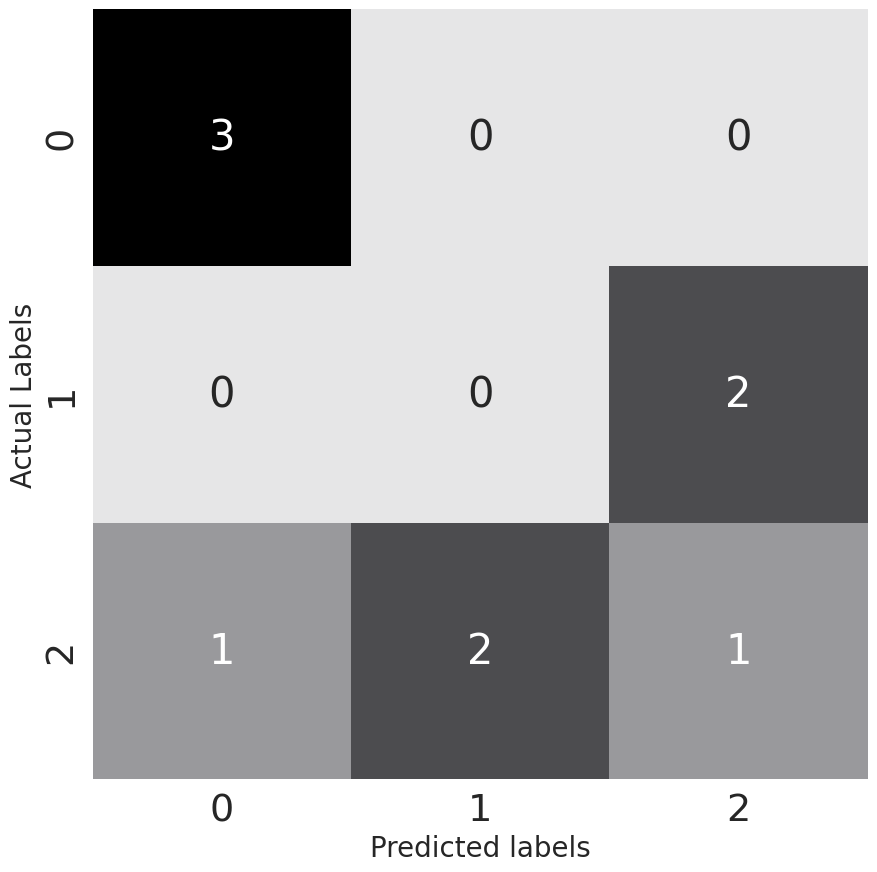

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

y_true = [0, 1, 2, 0, 1, 2 , 0, 2, 2]
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]

cm = metrics.confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 10))
cmap = sns.cubehelix_palette(50, hue=0.05 ,rot=0, light = 0.9, dark = 0 , as_cmap =True)
sns.set(font_scale=2.5)
sns.heatmap(cm, annot=True, cmap=cmap, cbar=False)
plt.ylabel("Actual Labels", fontsize=20)
plt.xlabel("Predicted labels", fontsize=20)

# Multi-Label Classification

 - Precision at k (P@k) 
 - Average precision at k (AP@k) 
 - Mean average precision at k (MAP@k) 
 - Log loss

## precision at k or P@k

If you have a list of original classes for a given 
sample and list of predicted classes for the same, precision is defined as the number 
of hits in the predicted list considering only top-k predictions, divided by k. 

In [ ]:
from pytz import common_timezones


def pk(y_true, y_pred, k): 
    """
    This function calculates precision at k
    for a single sample 

    Args:
        y_true (array): list of vaues, actual classes
        y_pred (array): list of values, predicted classes
        k (float): precision at k value
    """
    
    if k == 0: 
        return 0 
    y_pred = y_pred[:k]
    pred_set = set(y_pred)
    true_set = set(y_true)
    common_values = pred_set.intersection(true_set)
    return len(common_values) / len(y_pred[:k])


## Average Precision at k or AP@k

AP@k is calculated using P@k. 
For example, if we have to calculate AP@3, we calculate P@1, P@2 and P@3 and 
then divide the sum by 3.

In [ ]:
def api(y_ture, y_pred, k):
    """ 
        This function calculates average precision at k  
        for a single sample 
        :param y_true: list of values, actual classes 
        :param y_pred: list of values, predicted classes 
        :return: average precision at a given value k 
    """
    pk_values = []
    
    for i in range(1, k+ 1): 
        pk_values.append(pk(y_ture, y_pred, i))
    
    if len(pk_values) == 0:
        return 0
    return sum(pk_values) / len(pk_values)

##  mean average precision at k or MAP@k

In [ ]:
def mapk(y_true, y_pred, k):
    """ 
    This function calculates mean avg precision at k  
    for a single sample 
    :param y_true: list of values, actual classes 
    :param y_pred: list of values, predicted classes 
    :return: mean avg precision at a given value k 
    """ 
    apk_values = []
    for i in range(len(y_true)): 
        apk_values.append(
            api(y_true[i], y_pred[i], k)
        )
    return sum(apk_values) / len(apk_values)

## Log loss for multi-label classification

conver the targets to binary format and then use a log loss for each column. In the end, take the average of log loss in each column. AKA main column-wise log loss. 

## Mean Absolute Error
 Error is simple and very easy to 
understand. <br>
Error = True Value – Predicted Value <br>
Absolute error is just absolute of the above. <br>
Absolute Error = Abs ( True Value – Predicted Value ) <br>
Then we have mean absolute error (MAE). It’s just mean of all absolute errors. 

In [ ]:
import numpy as np

def mean_absolute_error(y_true, y_pred): 
    """
    Function to calculate Mean Absolute Error
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: MAE score
    """
    error = 0 
    for yt, yp in zip(y_true, y_pred): 
        error += abs(yt- yp) 
    return error / len(y_true)

## Mean squared error (MSE)
Squared Error = ( True Value – Predicted Value )2

In [ ]:
def mean_squared_error(y_true, y_pred): 
    """
    Function to calculate Mean Squared Errorl
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: MSE score
    """
    error = 0 
    for yt, yp in zip(y_true, y_pred):
        error += (yt - yp ) ** 2
    return error / len(y_true) 

## R-squared or coefficient of determination
R-sqared says how good your model fits that data. <br>
R-squared closer to 1.0 says that the model fits the data quite well<br>
Whereas closer 0 means the model isn't that good. <br>

<b>NOTE: R-sq can be negative if the model just makes absurd predictions</b>

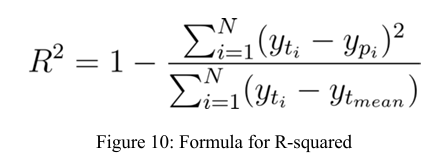

## Quadratic weighted kappa(QWK) or Cohens kappa

QWK measures the "agreement" between two "ratings". The ratings can be any real numbers in 0 to N. And predictions are also in the same range. An agreement can be defined as how close these ratings are to each other. 